In [1]:
import os
import re
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Rav

In [3]:
ravdess_train_data = []
ravdess_test_data = []
with open('../data/txt/train_ravdess_ck.txt', 'r') as f:
    for line in f:
        ravdess_train_data.append(line.strip())
with open('../data/txt/test_ravdess_ck.txt', 'r') as f:
    for line in f:
        ravdess_test_data.append(line.strip())

In [4]:
lab = {0: 'Happy', 1: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Sad', 5:'Surprise'}
listvalue = list(lab.values())
listvalue

['Happy', 'Angry', 'Disgust', 'Fear', 'Sad', 'Surprise']

In [5]:
def report_pred(datafold, eval_fold, listvalue):
    num = 0
    label_fold = []
    pred_fold = []
    for i in eval_fold:
        data = i.split(", ")
        label = int(data[0][-1])
        pred = int(data[1][-1])
        label_fold.append(label)
        pred_fold.append(pred)
    for i in range(len(datafold)):
        label = int(label_fold[i])
        pred = int(pred_fold[i])
        tf = label == pred
        if not tf:
            print(f'{datafold[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
            num += 1
    print(f'Number of wrong predictions: {num}')
    return label_fold, pred_fold
        

## model pred score (normal eval data)

In [6]:
print(ravdess_test_data)

['angry/02-01-05-01-01-01-01 angry', 'angry/02-01-05-01-01-01-04 angry', 'angry/02-01-05-01-01-01-05 angry', 'angry/02-01-05-01-01-01-13 angry', 'angry/02-01-05-01-01-01-16 angry', 'angry/02-01-05-01-01-01-22 angry', 'angry/02-01-05-01-01-02-01 angry', 'angry/02-01-05-01-01-02-04 angry', 'angry/02-01-05-01-01-02-05 angry', 'angry/02-01-05-01-01-02-13 angry', 'angry/02-01-05-01-01-02-16 angry', 'angry/02-01-05-01-01-02-22 angry', 'angry/02-01-05-01-02-01-01 angry', 'angry/02-01-05-01-02-01-04 angry', 'angry/02-01-05-01-02-01-05 angry', 'angry/02-01-05-01-02-01-13 angry', 'angry/02-01-05-01-02-01-16 angry', 'angry/02-01-05-01-02-01-22 angry', 'angry/02-01-05-01-02-02-01 angry', 'angry/02-01-05-01-02-02-04 angry', 'angry/02-01-05-01-02-02-05 angry', 'angry/02-01-05-01-02-02-13 angry', 'angry/02-01-05-01-02-02-16 angry', 'angry/02-01-05-01-02-02-22 angry', 'angry/02-01-05-02-01-01-01 angry', 'angry/02-01-05-02-01-01-04 angry', 'angry/02-01-05-02-01-01-05 angry', 'angry/02-01-05-02-01-01-13

In [7]:
eval_normal_rav = []
with open('../log/rav_model/ravdess_eval_fan_ravdess_train_date_09-Mar-2024-06-05-34.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_normal_rav.append(line.strip())
print(eval_normal_rav)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [8]:
eval_normal_rav_label, eval_normal_rav_pred = report_pred(ravdess_test_data, eval_normal_rav, listvalue)

angry/02-01-05-01-02-01-16 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-02-01-01-05 angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
angry/02-01-05-02-01-02-04 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-02-02-02-05 angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
disgust/02-01-07-01-01-01-01 disgust, Label: 2 (Disgust), Pred: 4 (Sad), Correct: False
disgust/02-01-07-01-01-01-05 disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
disgust/02-01-07-01-01-01-13 disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
disgust/02-01-07-01-01-02-05 disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
disgust/02-01-07-01-01-02-22 disgust, Label: 2 (Disgust), Pred: 3 (Fear), Correct: False
disgust/02-01-07-01-02-01-01 disgust, Label: 2 (Disgust), Pred: 4 (Sad), Correct: False
disgust/02-01-07-01-02-01-22 disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
disgust/02-01-07-01-02-02-01 disgust

In [9]:
print(classification_report(eval_normal_rav_label, eval_normal_rav_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.89      1.00      0.94        96
       Angry       0.77      0.96      0.85        96
     Disgust       0.87      0.69      0.77        48
        Fear       0.68      0.64      0.66        96
         Sad       0.69      0.56      0.62        96
    Surprise       0.70      0.67      0.68        48

    accuracy                           0.77       480
   macro avg       0.76      0.75      0.75       480
weighted avg       0.76      0.77      0.76       480



## loss

In [10]:
epochs = []
train_loss = []
val_loss = []
with open("../log/rav_model/ravdess_loss_fan_train_75_25_date_04-Mar-2024-19-14-43.txt", "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss.append(float(temp[0]))
print(epochs)
print(train_loss)
print(val_loss)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
[0.9447, 0.4081, 0.243, 0.1613, 0.1135, 0.0823, 0.0621, 0.0487, 0.0396, 0.0321, 0.0269, 0.0228, 0.02, 0.0173, 0.015, 0.0137, 0.012, 0.011, 0.01, 0.0093, 0.0084, 0.0079, 0.0072, 0.0067, 0.0063, 0.006, 0.0055, 0

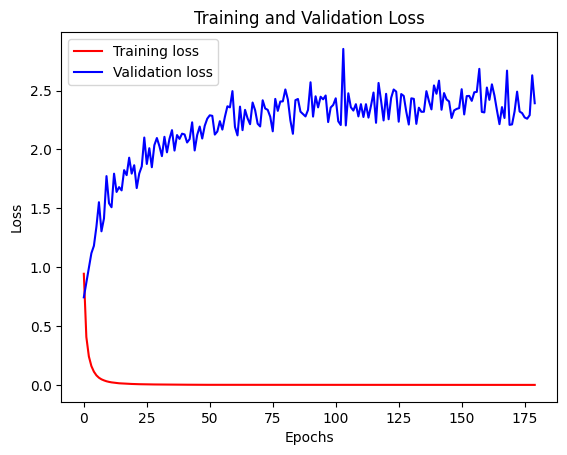

In [11]:
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## glass data

### eval

In [12]:
print(ravdess_test_data)

['angry/02-01-05-01-01-01-01 angry', 'angry/02-01-05-01-01-01-04 angry', 'angry/02-01-05-01-01-01-05 angry', 'angry/02-01-05-01-01-01-13 angry', 'angry/02-01-05-01-01-01-16 angry', 'angry/02-01-05-01-01-01-22 angry', 'angry/02-01-05-01-01-02-01 angry', 'angry/02-01-05-01-01-02-04 angry', 'angry/02-01-05-01-01-02-05 angry', 'angry/02-01-05-01-01-02-13 angry', 'angry/02-01-05-01-01-02-16 angry', 'angry/02-01-05-01-01-02-22 angry', 'angry/02-01-05-01-02-01-01 angry', 'angry/02-01-05-01-02-01-04 angry', 'angry/02-01-05-01-02-01-05 angry', 'angry/02-01-05-01-02-01-13 angry', 'angry/02-01-05-01-02-01-16 angry', 'angry/02-01-05-01-02-01-22 angry', 'angry/02-01-05-01-02-02-01 angry', 'angry/02-01-05-01-02-02-04 angry', 'angry/02-01-05-01-02-02-05 angry', 'angry/02-01-05-01-02-02-13 angry', 'angry/02-01-05-01-02-02-16 angry', 'angry/02-01-05-01-02-02-22 angry', 'angry/02-01-05-02-01-01-01 angry', 'angry/02-01-05-02-01-01-04 angry', 'angry/02-01-05-02-01-01-05 angry', 'angry/02-01-05-02-01-01-13

In [13]:
eval_glass_rav = []
with open('../log/rav_model/ravdess_glass_eval_fan_ravdess_train_date_09-Mar-2024-06-12-42.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_glass_rav.append(line.strip())
print(eval_glass_rav)

['Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [14]:
eval_glass_rav_label, eval_glass_rav_pred = report_pred(ravdess_test_data, eval_glass_rav, listvalue)

angry/02-01-05-01-01-01-01 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-04 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-13 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-16 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-22 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-02-01 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-02-13 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-02-22 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-02-01-01 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-02-01-13 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-02-01-16 angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
angry/02-01-05-01-02-01-22 angry, Label: 1 (Angry), Pred: 5 (Sur

In [15]:
print(classification_report(eval_glass_rav_label, eval_glass_rav_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.91      1.00      0.95        96
       Angry       0.98      0.59      0.74        96
     Disgust       0.60      0.79      0.68        48
        Fear       0.00      0.00      0.00        96
         Sad       0.47      0.70      0.56        96
    Surprise       0.25      0.58      0.35        48

    accuracy                           0.60       480
   macro avg       0.54      0.61      0.55       480
weighted avg       0.56      0.60      0.55       480



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### train

#### normal

In [16]:
print(ravdess_train_data)

['angry/02-01-05-01-01-01-02 angry', 'angry/02-01-05-01-01-01-03 angry', 'angry/02-01-05-01-01-01-06 angry', 'angry/02-01-05-01-01-01-07 angry', 'angry/02-01-05-01-01-01-08 angry', 'angry/02-01-05-01-01-01-09 angry', 'angry/02-01-05-01-01-01-10 angry', 'angry/02-01-05-01-01-01-11 angry', 'angry/02-01-05-01-01-01-12 angry', 'angry/02-01-05-01-01-01-14 angry', 'angry/02-01-05-01-01-01-15 angry', 'angry/02-01-05-01-01-01-17 angry', 'angry/02-01-05-01-01-01-18 angry', 'angry/02-01-05-01-01-01-19 angry', 'angry/02-01-05-01-01-01-20 angry', 'angry/02-01-05-01-01-01-21 angry', 'angry/02-01-05-01-01-01-23 angry', 'angry/02-01-05-01-01-01-24 angry', 'angry/02-01-05-01-01-02-02 angry', 'angry/02-01-05-01-01-02-03 angry', 'angry/02-01-05-01-01-02-06 angry', 'angry/02-01-05-01-01-02-07 angry', 'angry/02-01-05-01-01-02-08 angry', 'angry/02-01-05-01-01-02-09 angry', 'angry/02-01-05-01-01-02-10 angry', 'angry/02-01-05-01-01-02-11 angry', 'angry/02-01-05-01-01-02-12 angry', 'angry/02-01-05-01-01-02-14

In [17]:
eval_train_rav = []
with open('../log/rav_model/ravdess_train_eval_fan_ravdess_train_date_09-Mar-2024-06-22-02.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_train_rav.append(line.strip())
print(eval_train_rav)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [18]:
eval_train_rav_label, eval_train_rav_pred = report_pred(ravdess_train_data, eval_train_rav, listvalue)

Number of wrong predictions: 0


In [19]:
print(classification_report(eval_train_rav_label, eval_train_rav_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00       280
       Angry       1.00      1.00      1.00       280
     Disgust       1.00      1.00      1.00       144
        Fear       1.00      1.00      1.00       280
         Sad       1.00      1.00      1.00       280
    Surprise       1.00      1.00      1.00       144

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408



#### glass

In [20]:
print(ravdess_train_data)

['angry/02-01-05-01-01-01-02 angry', 'angry/02-01-05-01-01-01-03 angry', 'angry/02-01-05-01-01-01-06 angry', 'angry/02-01-05-01-01-01-07 angry', 'angry/02-01-05-01-01-01-08 angry', 'angry/02-01-05-01-01-01-09 angry', 'angry/02-01-05-01-01-01-10 angry', 'angry/02-01-05-01-01-01-11 angry', 'angry/02-01-05-01-01-01-12 angry', 'angry/02-01-05-01-01-01-14 angry', 'angry/02-01-05-01-01-01-15 angry', 'angry/02-01-05-01-01-01-17 angry', 'angry/02-01-05-01-01-01-18 angry', 'angry/02-01-05-01-01-01-19 angry', 'angry/02-01-05-01-01-01-20 angry', 'angry/02-01-05-01-01-01-21 angry', 'angry/02-01-05-01-01-01-23 angry', 'angry/02-01-05-01-01-01-24 angry', 'angry/02-01-05-01-01-02-02 angry', 'angry/02-01-05-01-01-02-03 angry', 'angry/02-01-05-01-01-02-06 angry', 'angry/02-01-05-01-01-02-07 angry', 'angry/02-01-05-01-01-02-08 angry', 'angry/02-01-05-01-01-02-09 angry', 'angry/02-01-05-01-01-02-10 angry', 'angry/02-01-05-01-01-02-11 angry', 'angry/02-01-05-01-01-02-12 angry', 'angry/02-01-05-01-01-02-14

In [21]:
eval_train_glass_rav = []
with open('../log/rav_model/ravdess_train_glass_eval_fan_ravdess_train_date_09-Mar-2024-06-17-33.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_train_glass_rav.append(line.strip())
print(eval_train_glass_rav)

['Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 5', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, P

In [22]:
eval_train_glass_rav_label, eval_train_glass_rav_pred = report_pred(ravdess_train_data, eval_train_glass_rav, listvalue)

angry/02-01-05-01-01-01-02 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-03 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-06 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-07 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-08 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-09 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-10 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-12 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-14 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-15 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/02-01-05-01-01-01-17 angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
angry/02-01-05-01-01-01-19 angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
angry/

In [23]:
print(classification_report(eval_train_glass_rav_label, eval_train_glass_rav_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.98      1.00      0.99       280
       Angry       0.98      0.51      0.67       280
     Disgust       0.84      0.88      0.86       144
        Fear       1.00      0.02      0.04       280
         Sad       0.38      0.99      0.55       280
    Surprise       0.53      0.33      0.41       144

    accuracy                           0.62      1408
   macro avg       0.78      0.62      0.59      1408
weighted avg       0.80      0.62      0.58      1408



# Oulu

In [24]:
oulu_all_data = []
oulu_all_glasses = []
with open('../data/txt/all_oulu.txt', 'r') as f:
    for line in f:
        oulu_all_data.append(line.strip())
with open('../data/txt/all_oulu_glass.txt', 'r') as f:
    for line in f:
        oulu_all_glasses.append(line.strip())

## normal

In [25]:
print(oulu_all_data)

['Angry/VL_P002_D_A Angry', 'Angry/VL_P002_S_A Angry', 'Angry/VL_P002_W_A Angry', 'Angry/VL_P004_D_A Angry', 'Angry/VL_P004_S_A Angry', 'Angry/VL_P004_W_A Angry', 'Angry/VL_P006_D_A Angry', 'Angry/VL_P006_S_A Angry', 'Angry/VL_P006_W_A Angry', 'Angry/VL_P007_D_A Angry', 'Angry/VL_P007_S_A Angry', 'Angry/VL_P007_W_A Angry', 'Angry/VL_P008_D_A Angry', 'Angry/VL_P008_S_A Angry', 'Angry/VL_P008_W_A Angry', 'Angry/VL_P010_D_A Angry', 'Angry/VL_P010_S_A Angry', 'Angry/VL_P010_W_A Angry', 'Angry/VL_P012_D_A Angry', 'Angry/VL_P012_S_A Angry', 'Angry/VL_P012_W_A Angry', 'Angry/VL_P013_D_A Angry', 'Angry/VL_P013_S_A Angry', 'Angry/VL_P013_W_A Angry', 'Angry/VL_P014_D_A Angry', 'Angry/VL_P014_S_A Angry', 'Angry/VL_P014_W_A Angry', 'Angry/VL_P015_D_A Angry', 'Angry/VL_P015_S_A Angry', 'Angry/VL_P015_W_A Angry', 'Angry/VL_P020_D_A Angry', 'Angry/VL_P020_S_A Angry', 'Angry/VL_P020_W_A Angry', 'Angry/VL_P021_D_A Angry', 'Angry/VL_P021_S_A Angry', 'Angry/VL_P021_W_A Angry', 'Angry/VL_P023_D_A Angry', 

In [26]:
eval_oulu_data = []
with open('../log/rav_model/oulu_alldata_fan_ravdess_train_date_15-Mar-2024-03-32-56.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_oulu_data.append(line.strip())
print(eval_oulu_data)

['Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 3', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 3', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 1, P

In [27]:
eval_oulu_data_label, eval_oulu_data_pred = report_pred(oulu_all_data, eval_oulu_data, listvalue)

Angry/VL_P002_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P002_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P002_W_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P004_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P004_S_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P006_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P006_S_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P007_D_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P007_S_A Angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
Angry/VL_P007_W_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P008_D_A Angry, Label: 1 (Angry), Pred: 3 (Fear), Correct: False
Angry/VL_P008_S_A Angry, Label: 1 (Angry), Pred: 5 (Surprise), Correct: False
Angry/VL_P010_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P010_W_A Angry, Label: 1 (An

In [28]:
print(classification_report(eval_oulu_data_label, eval_oulu_data_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.86      0.36      0.51       239
       Angry       0.24      0.50      0.32       238
     Disgust       0.41      0.23      0.30       239
        Fear       0.27      0.16      0.20       240
         Sad       0.28      0.26      0.27       237
    Surprise       0.30      0.43      0.35       240

    accuracy                           0.32      1433
   macro avg       0.39      0.32      0.33      1433
weighted avg       0.39      0.32      0.33      1433



## glass

In [29]:
print(oulu_all_glasses)

['Angry/VL_P001_S_A Angry', 'Angry/VL_P001_W_A Angry', 'Angry/VL_P002_D_A Angry', 'Angry/VL_P002_S_A Angry', 'Angry/VL_P002_W_A Angry', 'Angry/VL_P003_S_A Angry', 'Angry/VL_P003_W_A Angry', 'Angry/VL_P004_S_A Angry', 'Angry/VL_P004_W_A Angry', 'Angry/VL_P005_S_A Angry', 'Angry/VL_P005_W_A Angry', 'Angry/VL_P006_S_A Angry', 'Angry/VL_P006_W_A Angry', 'Angry/VL_P007_D_A Angry', 'Angry/VL_P007_S_A Angry', 'Angry/VL_P008_D_A Angry', 'Angry/VL_P008_S_A Angry', 'Angry/VL_P008_W_A Angry', 'Angry/VL_P009_S_A Angry', 'Angry/VL_P010_S_A Angry', 'Angry/VL_P011_S_A Angry', 'Angry/VL_P012_S_A Angry', 'Angry/VL_P013_S_A Angry', 'Angry/VL_P013_W_A Angry', 'Angry/VL_P014_D_A Angry', 'Angry/VL_P014_S_A Angry', 'Angry/VL_P015_D_A Angry', 'Angry/VL_P015_S_A Angry', 'Angry/VL_P015_W_A Angry', 'Angry/VL_P016_D_A Angry', 'Angry/VL_P016_S_A Angry', 'Angry/VL_P016_W_A Angry', 'Angry/VL_P017_D_A Angry', 'Angry/VL_P017_S_A Angry', 'Angry/VL_P018_D_A Angry', 'Angry/VL_P018_S_A Angry', 'Angry/VL_P019_D_A Angry', 

In [30]:
eval_oulu_glass = []
with open('../log/rav_model/oulu_glassalldata_fan_ravdess_train_date_15-Mar-2024-03-35-22.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_oulu_glass.append(line.strip())
print(eval_oulu_glass)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 2', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, P

In [31]:
eval_oulu_glass_label, eval_oulu_glass_pred = report_pred(oulu_all_glasses, eval_oulu_glass, listvalue)

Angry/VL_P002_D_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P002_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P002_W_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P003_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P004_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P005_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P006_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P007_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P008_D_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P008_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P009_S_A Angry, Label: 1 (Angry), Pred: 2 (Disgust), Correct: False
Angry/VL_P011_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P012_S_A Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
Angry/VL_P013_S_A Angry, Label: 1 (Angr

In [32]:
print(classification_report(eval_oulu_glass_label, eval_oulu_glass_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.85      0.28      0.42       196
       Angry       0.17      0.54      0.26       192
     Disgust       0.33      0.39      0.36       191
        Fear       0.00      0.00      0.00       199
         Sad       0.18      0.23      0.20       202
    Surprise       0.54      0.07      0.12       192

    accuracy                           0.25      1172
   macro avg       0.34      0.25      0.23      1172
weighted avg       0.34      0.25      0.23      1172



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CK (no contempt)

In [33]:
ck_data = []
with open('../data/txt/all_ck_nocontemp.txt', 'r') as f:
    for line in f:
        ck_data.append(line.strip())
print(ck_data)


['S130/007 Angry', 'S501/001 Angry', 'S005/001 Disgust', 'S035/005 Disgust', 'S054/004 Disgust', 'S074/004 Disgust', 'S106/004 Disgust', 'S116/006 Disgust', 'S130/012 Disgust', 'S054/002 Fear', 'S074/001 Fear', 'S084/002 Fear', 'S501/004 Fear', 'S035/006 Happy', 'S064/003 Happy', 'S074/005 Happy', 'S094/004 Happy', 'S106/006 Happy', 'S116/007 Happy', 'S130/013 Happy', 'S064/004 Sad', 'S106/002 Sad', 'S130/009 Sad', 'S501/006 Sad', 'S035/001 Surprise', 'S054/003 Surprise', 'S064/001 Surprise', 'S074/002 Surprise', 'S084/001 Surprise', 'S094/001 Surprise', 'S116/001 Surprise', 'S130/001 Surprise', 'S010/004 Angry', 'S037/003 Angry', 'S055/004 Angry', 'S075/008 Angry', 'S117/006 Angry', 'S502/001 Angry', 'S055/003 Disgust', 'S065/005 Disgust', 'S075/005 Disgust', 'S085/004 Disgust', 'S095/006 Disgust', 'S107/005 Disgust', 'S131/010 Disgust', 'S055/006 Fear', 'S065/002 Fear', 'S117/003 Fear', 'S502/004 Fear', 'S010/006 Happy', 'S037/006 Happy', 'S055/005 Happy', 'S065/004 Happy', 'S075/006

## normal

In [34]:
eval_ck_data = []
with open('../log/rav_model/allckplusdata_nocontemp_fan_ravdess_train_date_15-Mar-2024-03-45-11.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_ck_data.append(line.strip())
print(eval_ck_data)

['Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 3, Pred: 1', 'Label: 3, Pred: 5', 'Label: 3, Pred: 5', 'Label: 3, Pred: 3', 'Label: 0, Pred: 0', 'Label: 0, Pred: 1', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 4, Pred: 1', 'Label: 4, Pred: 4', 'Label: 4, Pred: 1', 'Label: 4, Pred: 3', 'Label: 5, Pred: 1', 'Label: 5, Pred: 5', 'Label: 5, Pred: 1', 'Label: 5, Pred: 5', 'Label: 5, Pred: 1', 'Label: 5, Pred: 1', 'Label: 5, Pred: 1', 'Label: 5, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 1', 'Label: 1, Pred: 2', 'Label: 1, Pred: 3', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 4', 'Label: 3, Pred: 3', 'Label: 3, P

In [35]:
eval_ck_data_label, eval_ck_data_pred = report_pred(ck_data, eval_ck_data, listvalue)

S054/004 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S116/006 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S130/012 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S054/002 Fear, Label: 3 (Fear), Pred: 1 (Angry), Correct: False
S074/001 Fear, Label: 3 (Fear), Pred: 5 (Surprise), Correct: False
S084/002 Fear, Label: 3 (Fear), Pred: 5 (Surprise), Correct: False
S064/003 Happy, Label: 0 (Happy), Pred: 1 (Angry), Correct: False
S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S501/006 Sad, Label: 4 (Sad), Pred: 3 (Fear), Correct: False
S035/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S064/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S084/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S094/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S116/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angr

In [36]:
print(classification_report(eval_ck_data_label, eval_ck_data_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.94      0.96      0.95        69
       Angry       0.32      0.87      0.47        45
     Disgust       0.65      0.41      0.50        59
        Fear       0.45      0.40      0.43        25
         Sad       0.56      0.36      0.43        28
    Surprise       0.88      0.43      0.58        83

    accuracy                           0.60       309
   macro avg       0.63      0.57      0.56       309
weighted avg       0.70      0.60      0.61       309



## glass

In [37]:
eval_ck_glass = []
with open('../log/rav_model/allckplusglassdata_nocontemp_fan_ravdess_train_date_15-Mar-2024-03-57-13.txt', 'r') as f:
    for line in f:
        if re.match(r"L", line):
            eval_ck_glass.append(line.strip())
print(eval_ck_glass)

['Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 1', 'Label: 2, Pred: 4', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 4', 'Label: 3, Pred: 1', 'Label: 3, Pred: 0', 'Label: 3, Pred: 4', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 0, Pred: 0', 'Label: 4, Pred: 1', 'Label: 4, Pred: 4', 'Label: 4, Pred: 4', 'Label: 4, Pred: 4', 'Label: 5, Pred: 1', 'Label: 5, Pred: 4', 'Label: 5, Pred: 1', 'Label: 5, Pred: 5', 'Label: 5, Pred: 1', 'Label: 5, Pred: 5', 'Label: 5, Pred: 1', 'Label: 5, Pred: 5', 'Label: 1, Pred: 4', 'Label: 1, Pred: 1', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 1, Pred: 4', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 4', 'Label: 2, Pred: 1', 'Label: 2, Pred: 1', 'Label: 2, Pred: 2', 'Label: 2, Pred: 2', 'Label: 3, Pred: 4', 'Label: 3, Pred: 4', 'Label: 3, P

In [38]:
eval_ck_glass_label, eval_ck_glass_pred = report_pred(ck_data, eval_ck_glass, listvalue)

S130/007 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S501/001 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False
S054/004 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False
S074/004 Disgust, Label: 2 (Disgust), Pred: 4 (Sad), Correct: False
S054/002 Fear, Label: 3 (Fear), Pred: 4 (Sad), Correct: False
S074/001 Fear, Label: 3 (Fear), Pred: 1 (Angry), Correct: False
S084/002 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False
S501/004 Fear, Label: 3 (Fear), Pred: 4 (Sad), Correct: False
S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False
S035/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S054/003 Surprise, Label: 5 (Surprise), Pred: 4 (Sad), Correct: False
S064/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S084/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S116/001 Surprise, Label: 5 (Surprise), Pred: 1 (Angry), Correct: False
S010/004 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: Fals

In [39]:
print(classification_report(eval_ck_glass_label, eval_ck_glass_pred, target_names=listvalue))

              precision    recall  f1-score   support

       Happy       0.94      0.94      0.94        69
       Angry       0.21      0.36      0.26        45
     Disgust       0.80      0.47      0.60        59
        Fear       0.00      0.00      0.00        25
         Sad       0.22      0.68      0.33        28
    Surprise       0.84      0.43      0.57        83

    accuracy                           0.53       309
   macro avg       0.50      0.48      0.45       309
weighted avg       0.64      0.53      0.55       309



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
